# Statistics: basics

In [2]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

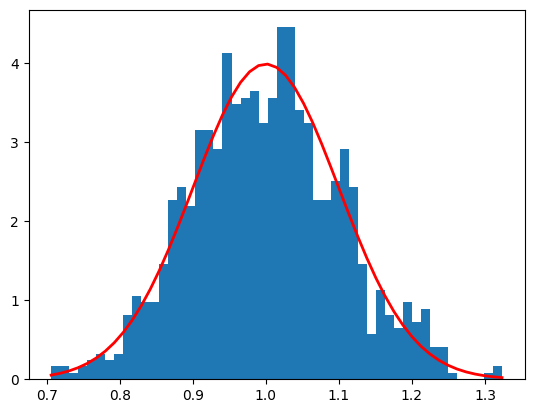

In [3]:
# Random variable, normal distribution
# x = meat consumption from Silpo over the last 1000 days
# y = probability that x meat amount will be bought on a given day
mu, sigma = 1, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

prob, bins, ignored = plt.hist(s, 50, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')

plt.show()


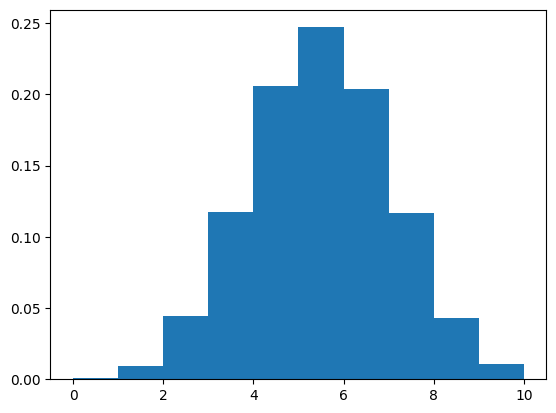

In [4]:
# Random variable, binomial distribution
# x = number of times we throw heads in 10 coin flips
# y = probaility to see x heads

n, p = 10, 0.5 # number of trials, probability of each trial
s = np.random.binomial(n, p, 100000) # 1000 experiments

prob, bins, ignored = plt.hist(s, n, density=True)
plt.show()

In [5]:
prob

array([0.00114, 0.00947, 0.04418, 0.1175 , 0.20601, 0.24709, 0.20378,
       0.11668, 0.04316, 0.01099])

In [6]:
# Expecte value
sum([(i * prob[i]) for i in range(n)])

np.float64(4.99345)

In [7]:
#s.mean()
np.median(s)

np.float64(5.0)

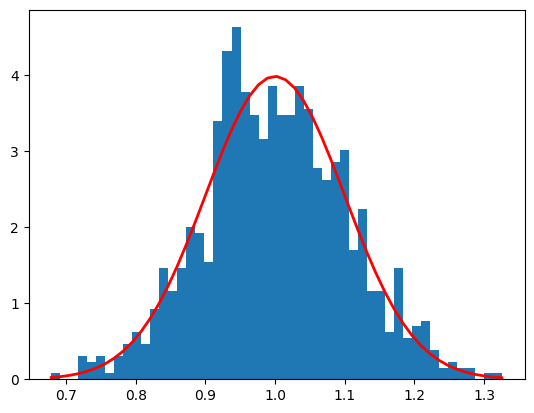

In [8]:
# Random variable, normal distribution - in more details
# x = meat consumption from Silpo over the last 1000 days
# y = probability that x meat amount will be bought on a given day

mu, sigma = 1, 0.1 # mean and standard deviation
x = np.random.normal(mu, sigma, 1000)

prob, bins, ignored = plt.hist(x, 50, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
plt.show()


In [9]:
from scipy.stats import norm

probability_pdf = norm.pdf(0.85, loc=mu, scale=sigma) # probability density function
print(probability_pdf)

1.2951759566589167


In [10]:
x.mean()

np.float64(1.000529297139422)

In [11]:
# Variance (dispersion) and Standard Deviation
var = np.sum((x - x.mean())**2) / len(x) # variance
std = np.sqrt(np.sum(((x-x.mean())**2)) / len(x)) # standard deviation

print(var, std)

0.010651655526868128 0.10320685794494534


In [12]:
# Standard deviatrion in numpy
np.std(x)

np.float64(0.10320685794494534)

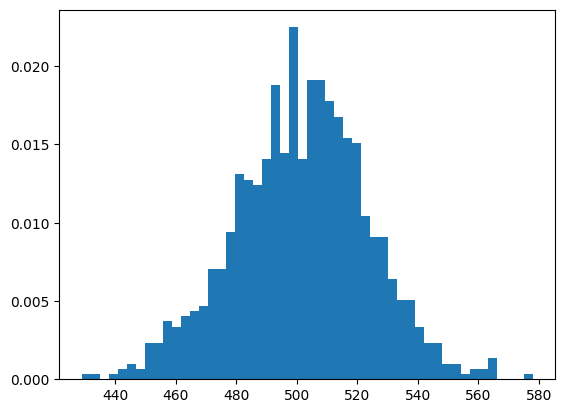

In [13]:
# new variable z = number of active cupons for discount on meat
z = np.random.poisson(500, 1000)
prob, bins, ignored = plt.hist(z, 50, density=True)
plt.show()

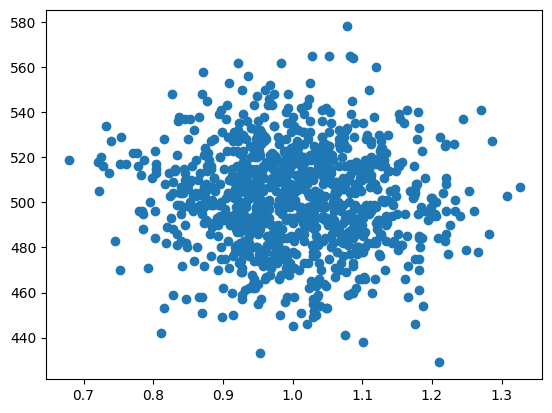

In [16]:
plt.scatter(x,z)

In [18]:
np.cov(x,z)[0][1] # covariance

np.float64(-0.11489195630221803)

In [20]:
# Кореляція - це коваріація, нормалізована на добуток стандартних відхилень
np.corrcoef(x,z)[0][1] # correlation


np.float64(-0.04989280683989552)

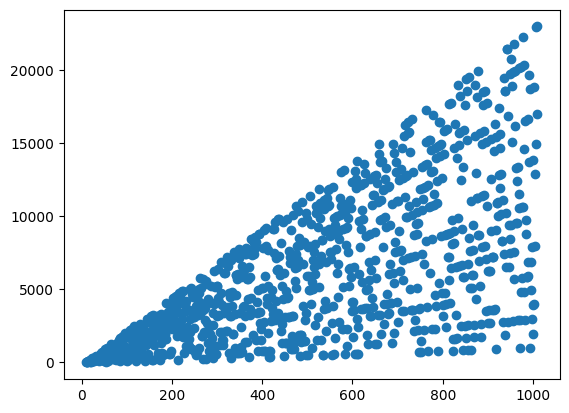

In [21]:
u = np.arange(10, 1010)
j = np.arange(0, 1000)*np.random.randint(1,24, size=(1000))
plt.scatter(u,j)

In [22]:
np.cov(u, j)[0][1] # covariance

np.float64(965947.2707707707)

In [23]:
np.corrcoef(u,j)[0][1] # correlation    

np.float64(0.659725732407027)

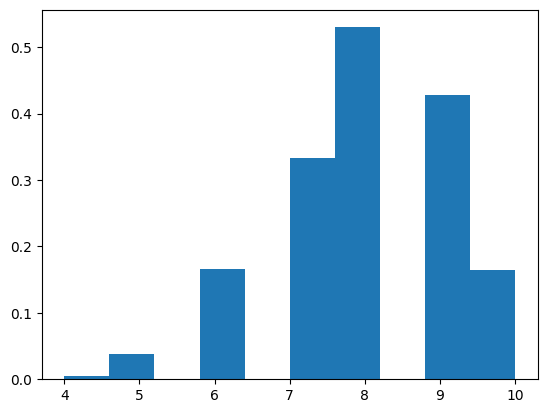

In [ ]:
# Central Limit Theorem (Центральна гранична теорема)
N = 100000000 # number of experiments
n = 1000 # number of trials
s = np.random.binomial(10, 0.8, N) # One side of the coin is havier than the other (probability of heads is 0.8)
s = s.reshape(N//n, n)

prob, bins, ignored = plt.hist(s[0], 10, density=True)
plt.show()

In [29]:
s_mean = s.mean(axis=1)
s_mean

array([7.974, 7.983, 7.986, ..., 8.068, 7.982, 7.996], shape=(100000,))

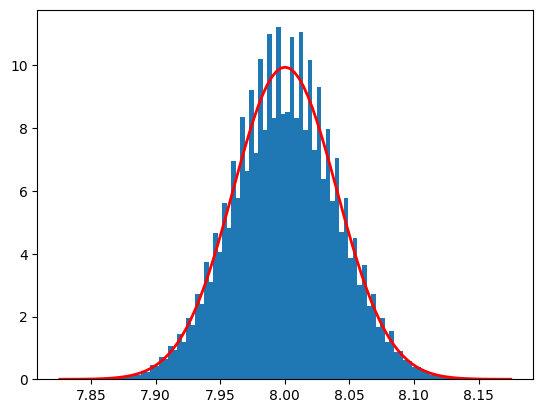

In [30]:
sigma = s_mean.std()
mu = s_mean.mean()

prob, bins, ignored = plt.hist(s_mean, 100, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
plt.show()

# Pandas

In [31]:
import pandas as pd
mountain_height = pd.Series([2061, 2035.8, 2028.5, 2022.5, 2016.4])

print(mountain_height.describe())

count       5.000000
mean     2032.840000
std        17.304421
min      2016.400000
25%      2022.500000
50%      2028.500000
75%      2035.800000
max      2061.000000
dtype: float64


In [38]:
mountains_height = pd.Series( data=[2061, 2035.8, 2028.5, 2022.5, 2016.4],
                              index=['Hoverla', 'Berbenskyl',  'Pip Ivan', 'Petros', 'Gutin-Tomnatyk'],
                              name = 'Height, m',
                              dtype = float,)
mountains_height


Hoverla           2061.0
Berbenskyl        2035.8
Pip Ivan          2028.5
Petros            2022.5
Gutin-Tomnatyk    2016.4
Name: Height, m, dtype: float64

In [ ]:
print(mountains_height['Petros'])
#print(mountains_height[2]) # deprecated way
print(mountains_height.iloc[2]) # recommended way to get value by index


2022.5
2028.5


In [43]:
print(mountains_height[1:4])
print(mountains_height[mountains_height > 2020]) # only mountains higher than 2020 m
print(mountains_height>2020) # all mountains with boolean mask
print(mountains_height["Berbenskyl":"Petros"])
print(mountains_height.Petros)
print("Hoverla" in mountains_height)

Berbenskyl    2035.8
Pip Ivan      2028.5
Petros        2022.5
Name: Height, m, dtype: float64
Hoverla       2061.0
Berbenskyl    2035.8
Pip Ivan      2028.5
Petros        2022.5
Name: Height, m, dtype: float64
Hoverla            True
Berbenskyl         True
Pip Ivan           True
Petros             True
Gutin-Tomnatyk    False
Name: Height, m, dtype: bool
Berbenskyl    2035.8
Pip Ivan      2028.5
Petros        2022.5
Name: Height, m, dtype: float64
2022.5
True


In [44]:
sort_index = mountains_height.sort_index()
sort_index

Berbenskyl        2035.8
Gutin-Tomnatyk    2016.4
Hoverla           2061.0
Petros            2022.5
Pip Ivan          2028.5
Name: Height, m, dtype: float64

In [45]:
mountains_height.sort_values(inplace=True, ascending=False)
mountains_height

Hoverla           2061.0
Berbenskyl        2035.8
Pip Ivan          2028.5
Petros            2022.5
Gutin-Tomnatyk    2016.4
Name: Height, m, dtype: float64

In [61]:
mountains_height = pd.Series({"Hoverla": 2061, "Berbenskyl": 2035.8,  "Pip Ivan": 2028.5},
                             index=['Hoverla', 'Berbenskyl',  'Pip Ivan', 'Petros', 'Gutin-Tomnatyk'],
                             name = 'Height, m',
                             dtype = float,)
print(mountains_height)
print('')

mountain_height_2 = mountains_height.fillna(0, inplace=False)
print(mountain_height_2)


Hoverla           2061.0
Berbenskyl        2035.8
Pip Ivan          2028.5
Petros               NaN
Gutin-Tomnatyk       NaN
Name: Height, m, dtype: float64

Hoverla           2061.0
Berbenskyl        2035.8
Pip Ivan          2028.5
Petros               0.0
Gutin-Tomnatyk       0.0
Name: Height, m, dtype: float64


In [64]:
mountain_height_2 = mountain_height_2.reset_index(drop=False)
mountain_height_2

,index,"Height, m"
0,Hoverla,2061.0
1,Berbenskyl,2035.8
2,Pip Ivan,2028.5
3,Petros,0.0
4,Gutin-Tomnatyk,0.0


In [68]:
#mountain_height_2.columns = ['Mountain', 'Height, m']
mountain_height_2
mountain_height_2.iloc[0]

Mountain     Hoverla
Height, m     2061.0
Name: 0, dtype: object

In [69]:
mountain_height_2[mountain_height_2['Height, m'] > 2030]

,Mountain,"Height, m"
0,Hoverla,2061.0
1,Berbenskyl,2035.8


In [70]:
mountain_height_2.loc[0, 'Mountain']

'Hoverla'

In [71]:
mountain_height_2[mountain_height_2['Mountain'] == 'Hoverla']

,Mountain,"Height, m"
0,Hoverla,2061.0


In [72]:
mountain_height_2.to_csv('mountains_height.csv', index=True)

# JSON

In [77]:
import json

data = {
    "columns": ["name", "country"],
    "index": [1, 2, 3],
    "data": [
        ["Michael", "Canada"],
        ["John", "USA"],
        ["Liza", "Australia"]
    ]
}

with open('employees.json', 'w') as f:    
    json.dump(data, f)

In [76]:
df_d = pd.DataFrame(**data)
df_d

,name,country
1,Michael,Canada
2,John,USA
3,Liza,Australia


In [ ]:
import os
PATH = os.getcwd()
employees = pd.read_json(os.path.join(PATH, 'employees.json'), orient = 'split') # orient could be 'split', 'records', 'index', 'columns', 'values'
print(employees)

      name    country
1  Michael     Canada
2     John        USA
3     Liza  Australia


In [79]:
data = {"name": ["Michael", "John", "Liza"],
        "country": ["Canada", "USA", "Australia"],}

In [80]:
with open('employees_2.json', 'w') as f:    
    json.dump(data, f)

In [81]:
pd.read_json(os.path.join(PATH, 'employees_2.json'), orient=None)
    

,name,country
0,Michael,Canada
1,John,USA
2,Liza,Australia


In [84]:
new_employee = pd.DataFrame.from_dict({"name": ["Svitlana"], "country": ["Ukraine"]})

new_employee

,name,country
0,Svitlana,Ukraine


In [ ]:
new_df = pd.concat([employees, new_employee], ignore_index=True) # if ignore_index was not set to True explicitly, the index would be duplicated (to fix this see next cell)
new_df

,name,country
1,Michael,Canada
2,John,USA
3,Liza,Australia
0,Svitlana,Ukraine


In [86]:
new_df = new_df.reset_index(drop=True)
new_df

,name,country
0,Michael,Canada
1,John,USA
2,Liza,Australia
3,Svitlana,Ukraine


#HTML


In [88]:
tmp = pd.read_html("https://statisticstimes.com/tech/top-computer-languages.php", attrs={'id': 'table_id1'})
print(tmp[0].head( ))

   Mar 2025 Change Programming language    Share  Trends
0         1    NaN               Python  30.27 %  +1.8 %
1         2    NaN                 Java  14.89 %  -0.9 %
2         3    NaN           JavaScript   7.78 %  -0.9 %
3         4      ↑                C/C++   7.12 %  +0.6 %
4         5      ↓                   C#   6.11 %  -0.6 %


In [89]:
tmp

[    Mar 2025 Change Programming language    Share  Trends
 0          1    NaN               Python  30.27 %  +1.8 %
 1          2    NaN                 Java  14.89 %  -0.9 %
 2          3    NaN           JavaScript   7.78 %  -0.9 %
 3          4      ↑                C/C++   7.12 %  +0.6 %
 4          5      ↓                   C#   6.11 %  -0.6 %
 5          6    NaN                    R   4.54 %  -0.1 %
 6          7    NaN                  PHP   3.74 %  -0.7 %
 7          8     ↑↑                 Rust   3.14 %  +0.6 %
 8          9      ↓           TypeScript   2.78 %  -0.1 %
 9         10      ↑          Objective-C   2.74 %  +0.3 %
 10        11     ↓↓                Swift   2.44 %  -0.3 %
 11        12    NaN                   Go   2.06 %  -0.2 %
 12        13    NaN               Kotlin    1.9 %  +0.0 %
 13        14    NaN               Matlab   1.68 %  +0.1 %
 14        15      ↑                  Ada   1.33 %  +0.3 %
 15        16      ↓                 Dart   1.03 %  -0.0